In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats

# Lab 6

## Problem 1

The 5 sigma threshold for a Poisson distribution with mean 100 is 154.

In [16]:
dist = stats.poisson(mu=100)
dist.isf(stats.norm.sf(5))

154.0

## Problem 2

### (A)

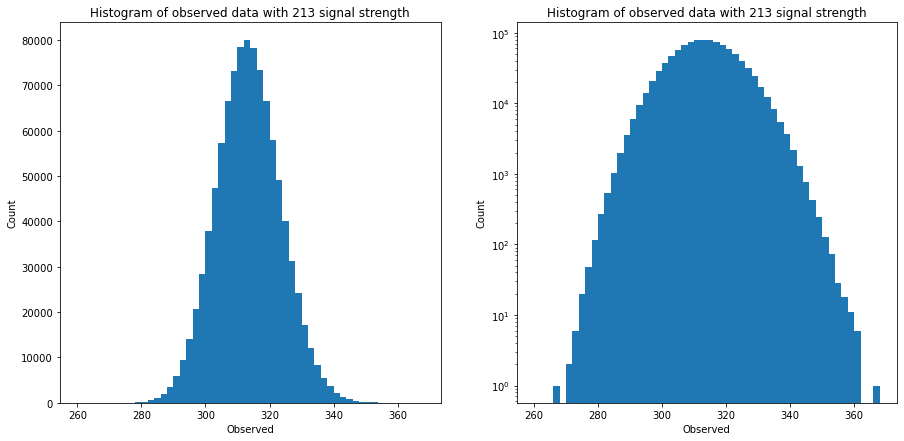

In [131]:
signal = 213
bkgd = dist.rvs(size=1000000)
data = signal + bkgd

fig, axs = plt.subplots(1,2, figsize=(15,7))
axs[1].set_yscale('log')

for ax in axs:
    ax.hist(data, bins=np.arange(260, 370, 2))
    ax.set_xlabel("Observed")
    ax.set_ylabel("Count")
    ax.set_title("Histogram of observed data with 213 signal strength")

This is the distribution of possible observations assuming that the true signal strength is 213. We know that the shape should be the same as the background, just shifted up by 213, and we know the background is Poisson with mean 100. By the CLT this will be approximately Gaussian, which is indeed what we see above.

### (B)

The signal is strongly biased. Since the Poisson distribution is positive definite, the observed measurement will always be at least as large as the true signal strength, and usually much larger (by about 100 on average). As for symmetry, we noted above that the distribution is approximately Gaussian and so will be approximately symmetric around its mean, but this is only an approximation. We can see from the logarithmic histogram that the tail on the right is slightly thicker than on the left, as we would expect for a Poisson distribution.

## Problem 3

### (A)

Below we are simulating 10,000,000 measurements, with random signal strengths chosen between 0 and 500 and the background following a Poisson distribution with mean 100, as before. The signal strengths are uniformly distributed (with integer values), so we have a flat prior.

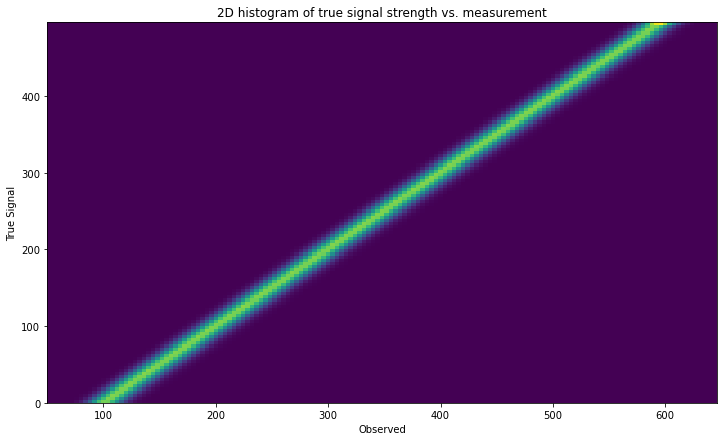

In [146]:
signal = stats.randint.rvs(size=10000000, low=0, high=500)
bkgd = dist.rvs(size=10000000)
data = bkgd + signal

fig, ax = plt.subplots(1,1, figsize=(12,7))
ax.hist2d(data, signal, bins=[np.arange(50,650,4), np.arange(0,500,4)])
ax.set_xlabel("Observed")
ax.set_ylabel("True Signal")
ax.set_title("2D histogram of true signal strength vs. measurement");

### (B)

We can see that the histograms below generally agree with those in Problem 2, though with a bit more noise due to the smaller sample size.

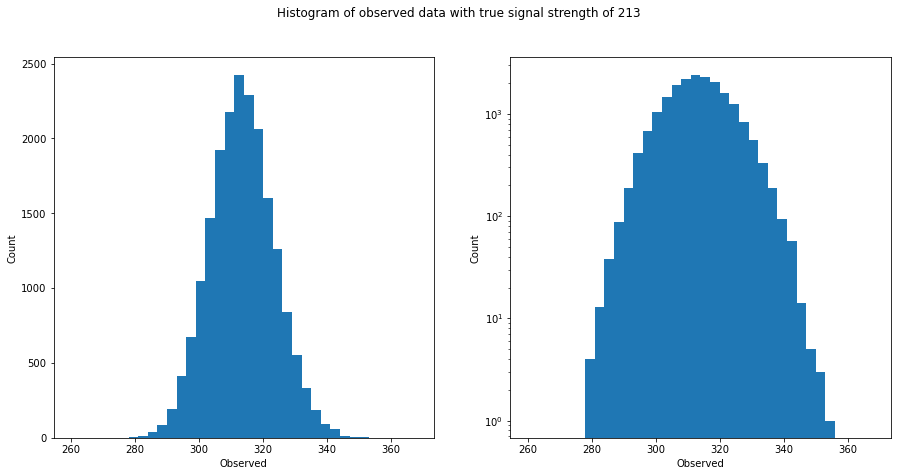

In [148]:
true = 213
fdata = data[signal == true]

fig, axs = plt.subplots(1,2, figsize=(15,7))
axs[1].set_yscale('log')
fig.suptitle("Histogram of observed data with true signal strength of 213")
for ax in axs:
    ax.hist(fdata, bins=np.arange(260, 370, 3))
    ax.set_xlabel("Observed")
    ax.set_ylabel("Count")

### (C)

We choose 321 as our candidate observation. The distribution of possible signal strenghts given this observation is shown below. More precisely, it is a histogram of the signal strengths corresponding to simulated observations of 321. We can see from this that the most likely signal is around 220, with a substantial probability anywhere between 200 and 240.

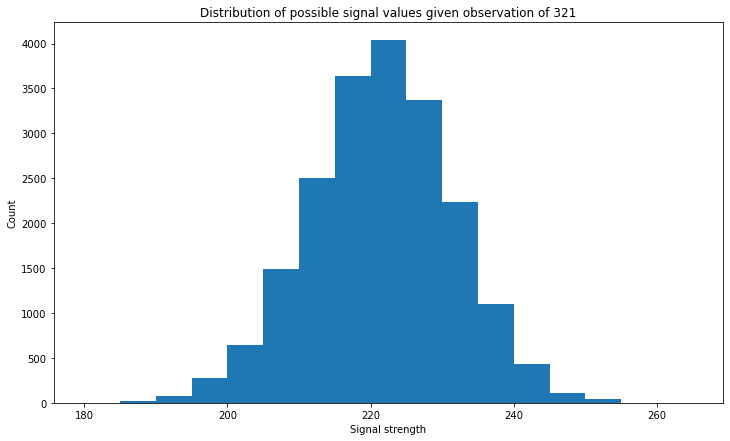

In [150]:
true = 321
fsignal = signal[data == true]

fig, ax = plt.subplots(1,1, figsize=(12,7))
ax.hist(fsignal, bins=np.arange(180, 270, 5))
ax.set_xlabel("Signal strength")
ax.set_ylabel("Count")
ax.set_title("Distribution of possible signal values given observation of 321");

### (D)

We find that the most probable signal strength is 222. We then step outward in one direction from this most probable value until we have included at least 42% of the distribution. Doing this both directions, we find that the 1 sigma confidence interval is $222^{+14}_{-12}$. 

In [141]:
mpv = stats.mode(fsignal).mode[0]
total = fsignal.size
thresh = stats.norm.cdf(1) / 2

for test in np.arange(0, 200):
    sliced = fsignal[np.logical_and(fsignal >= mpv, fsignal <= (mpv + test))]
    if sliced.size / fsignal.size > thresh:
        upper = test
        break
        
for test in np.arange(0, 200):
    sliced = fsignal[np.logical_and(fsignal <= mpv, fsignal >= (mpv - test))]
    if sliced.size / fsignal.size > thresh:
        lower = test
        break
        
print(f"Signal = {mpv} +{upper} -{lower}")

Signal = 222 +14 -12


### (E)

222 (the signal) is substantially smaller than 321 (the observation), so the result is biased. The confidence intervals are not exactly symmetric, with the positive one being slightly larger. Since the background distribution is almost but not exactly symmetric, this makes sense. Some of the asymmetry could also be due to the small sample size.